In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
df_train = df.fillna({'Item_Weight': df['Item_Weight'].mean(), 'Outlet_Size': 'Medium' })

In [5]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [6]:
df_train.describe(include = 'all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,8523.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,8523,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,5203,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.226124,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,9.310000,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.857645,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.000000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


<Axes: >

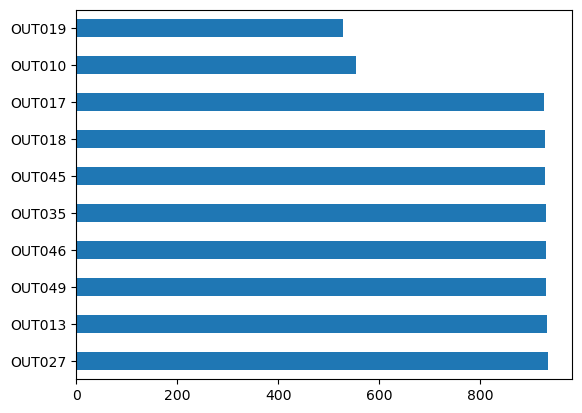

In [7]:
df_train['Outlet_Identifier'].value_counts().plot(kind ='barh')

In [8]:
df_train = df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


array([[<Axes: title={'center': 'Item_Visibility'}>]], dtype=object)

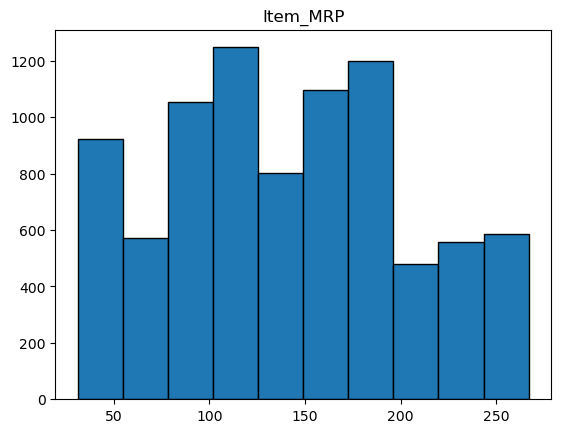

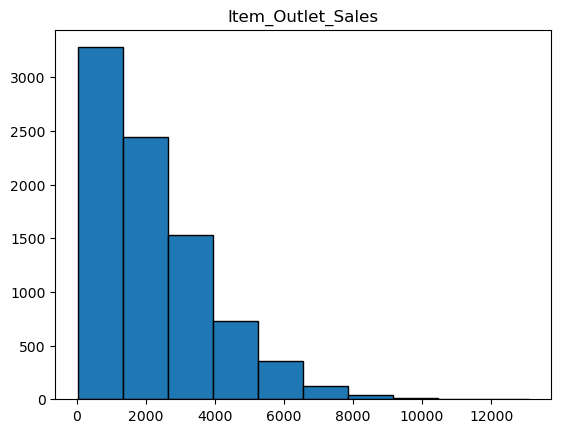

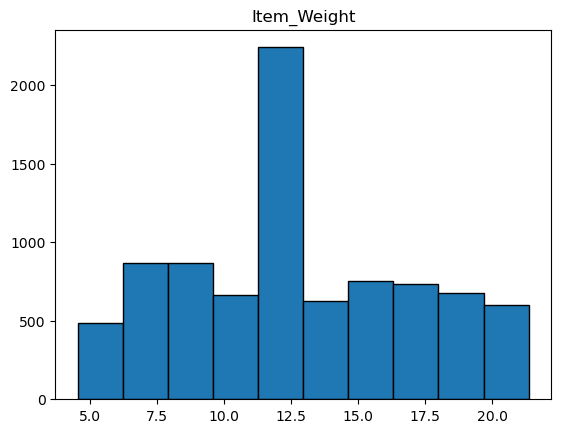

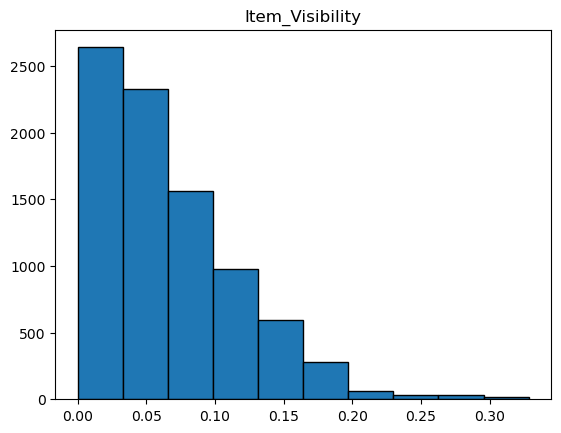

In [9]:
df_train.hist(column='Item_MRP', grid=False, edgecolor='black')
df_train.hist(column='Item_Outlet_Sales', grid=False, edgecolor='black')
df_train.hist(column='Item_Weight', grid=False, edgecolor='black')
df_train.hist(column='Item_Visibility', grid=False, edgecolor='black')


<Axes: >

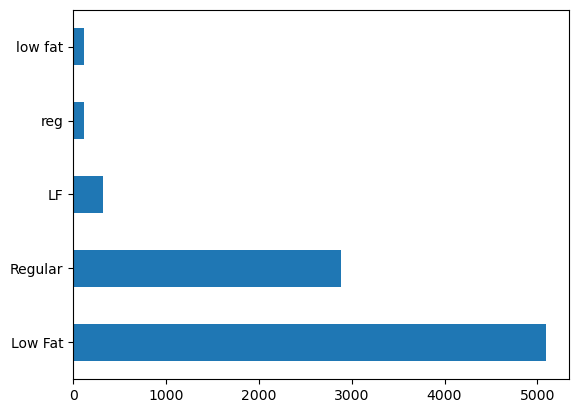

In [10]:
#Fat content
df_train['Item_Fat_Content'].value_counts().plot(kind ='barh')

<Axes: >

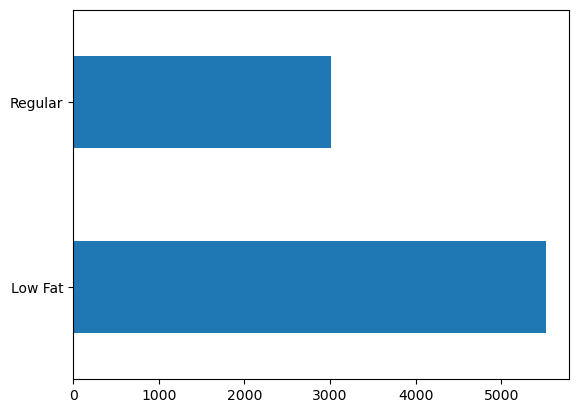

In [11]:
df_train = df_train.replace(to_replace= 'LF', value ='Low Fat')
df_train = df_train.replace(to_replace= 'reg', value ='Regular')
df_train = df_train.replace(to_replace= 'low fat', value ='Low Fat')
df_train['Item_Fat_Content'].value_counts().plot(kind ='barh')

<Axes: >

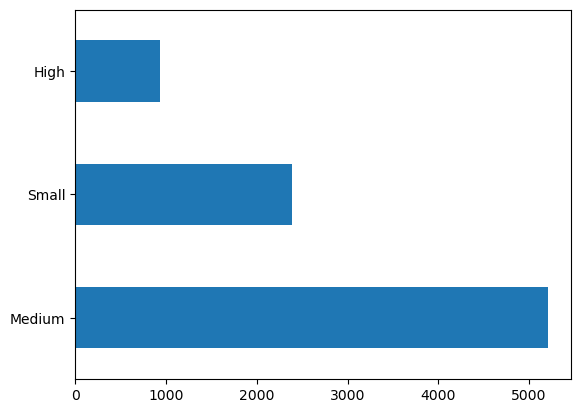

In [12]:
#Outlet_Size
df_train['Outlet_Size'].value_counts().plot(kind ='barh')

<Axes: >

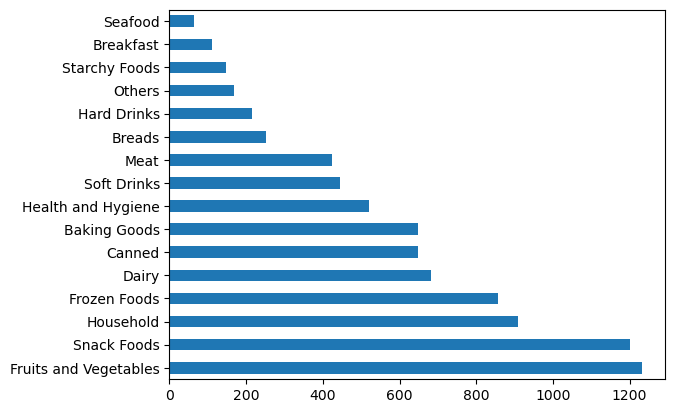

In [13]:
#Item_Type
df_train['Item_Type'].value_counts().plot(kind ='barh')

<Axes: >

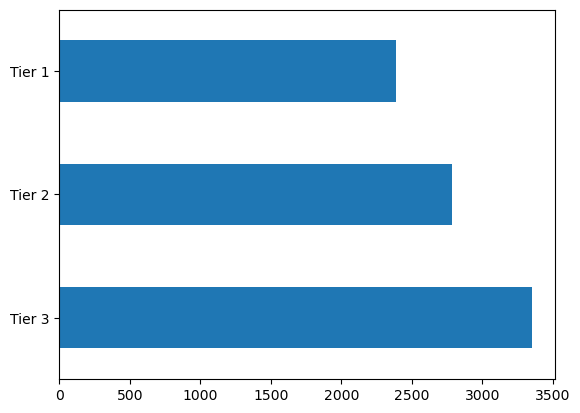

In [14]:
df_train['Outlet_Location_Type'].value_counts().plot(kind ='barh')

<Axes: >

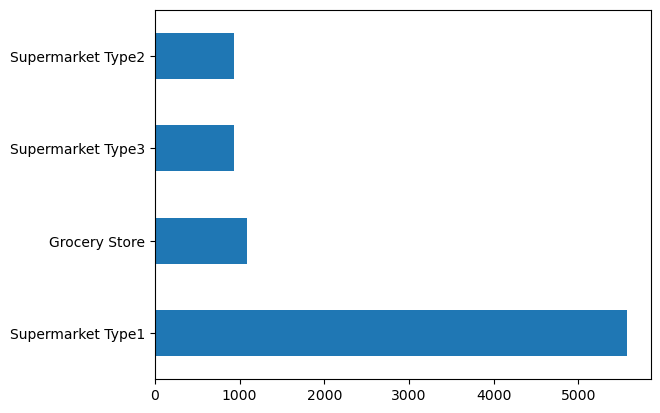

In [15]:
#Outlet_Type
df_train['Outlet_Type'].value_counts().plot(kind ='barh')

array([[<Axes: title={'center': 'Outlet_Establishment_Year'}>]],
      dtype=object)

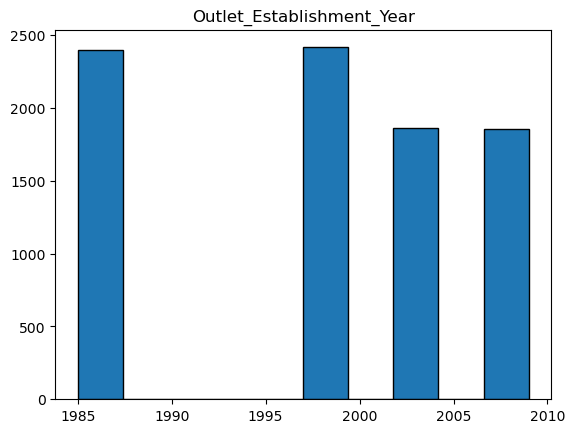

In [16]:
df_train.hist(column='Outlet_Establishment_Year', grid=False, edgecolor='black')

In [17]:
df_train["Quantity_Sold"] = (df_train["Item_Outlet_Sales"]/df_train["Item_MRP"])
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Quantity_Sold
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14.951963
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,9.186454
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14.809346
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,4.021967
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,18.467868


C:\Users\HP\AppData\Local\Temp\ipykernel_22584\2270859949.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")


<Axes: >

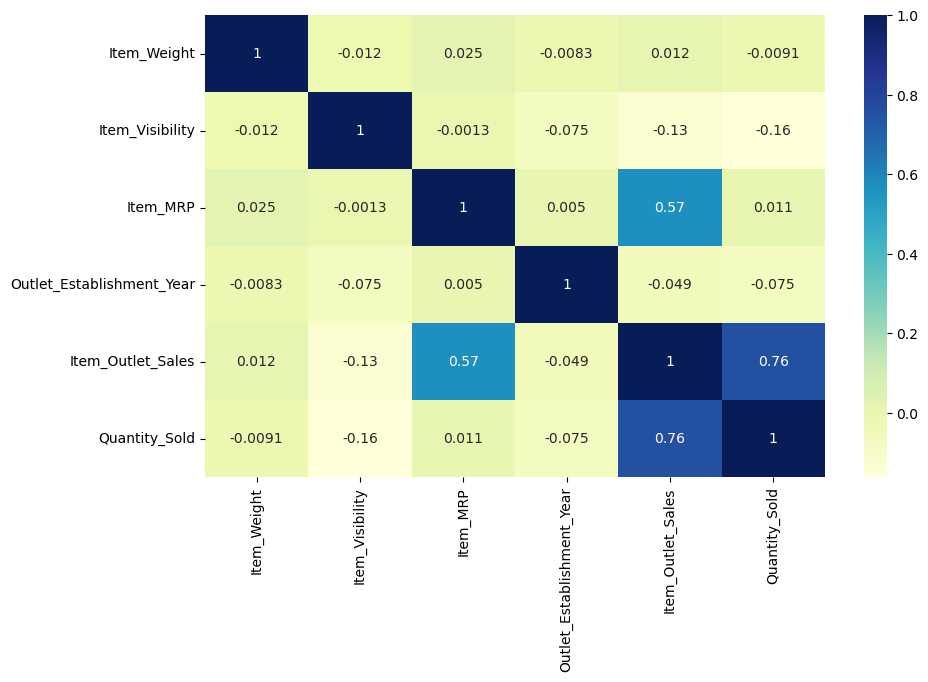

In [18]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")

In [19]:
categorical_columns=[a for a in df_train.dtypes.index if df_train.dtypes[a]=='object']
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [20]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in df_train.columns:
    df_train[col] = labelencoder.fit_transform(df_train[col])

In [21]:
#Now one hot encoding
df_train=pd.get_dummies(df_train, columns=['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type'],drop_first=False)

print(df_train.shape)

(8523, 34)


In [22]:
df_train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Quantity_Sold',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Type_0',
       'Item_Type_1', 'Item_Type_2', 'Item_Type_3', 'Item_Type_4',
       'Item_Type_5', 'Item_Type_6', 'Item_Type_7', 'Item_Type_8',
       'Item_Type_9', 'Item_Type_10', 'Item_Type_11', 'Item_Type_12',
       'Item_Type_13', 'Item_Type_14', 'Item_Type_15', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3'],
      dtype='object')

KeyError: "None of [Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',\n       'Outlet_Type'],\n      dtype='object')] are in the [columns]"

In [24]:
df_train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Quantity_Sold',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Type_0',
       'Item_Type_1', 'Item_Type_2', 'Item_Type_3', 'Item_Type_4',
       'Item_Type_5', 'Item_Type_6', 'Item_Type_7', 'Item_Type_8',
       'Item_Type_9', 'Item_Type_10', 'Item_Type_11', 'Item_Type_12',
       'Item_Type_13', 'Item_Type_14', 'Item_Type_15', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3'],
      dtype='object')

In [25]:
df = df_train[['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Type_0',
       'Item_Type_1', 'Item_Type_2', 'Item_Type_3', 'Item_Type_4',
       'Item_Type_5', 'Item_Type_6', 'Item_Type_7', 'Item_Type_8',
       'Item_Type_9', 'Item_Type_10', 'Item_Type_11', 'Item_Type_12',
       'Item_Type_13', 'Item_Type_14', 'Item_Type_15', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'Item_Outlet_Sales', 'Quantity_Sold']]
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,...,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Outlet_Sales,Quantity_Sold
0,284,664,5592,4,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,2540,4084
1,57,880,473,8,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,422,2217
2,376,715,2901,4,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1639,3972
3,393,0,4227,3,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,670,1119
4,265,0,627,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,865,5315


In [26]:
#Separating features and label
X = df.iloc[:,0:33].values
y = df.iloc[:,-1].values

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [28]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[6.10394230e-01 3.35737063e-01 5.28963051e-02 9.71299848e-04
 8.05715240e-07 6.86337627e-08 5.01485081e-08 2.85864445e-08
 2.58976441e-08 1.90387610e-08 1.50603608e-08 1.29257303e-08
 1.03976730e-08 9.65145933e-09 8.33101886e-09 8.09467669e-09
 6.72391989e-09 6.41505808e-09 5.74725453e-09 5.10424209e-09
 3.35510208e-09 2.72304646e-09 2.25800042e-09 1.95947055e-09
 1.65075968e-09 1.40224435e-09 8.96373832e-10 5.79551476e-10
 3.94593426e-33 3.94593426e-33 3.94593426e-33 3.94593426e-33
 3.94593426e-33]


In [29]:
print("Sorted List returned :")
print(sorted(explained_variance,reverse = True))

Sorted List returned :
[0.6103942302780863, 0.3357370634407994, 0.05289630513664154, 0.0009712998481694159, 8.057152404510803e-07, 6.863376274915e-08, 5.0148508137668824e-08, 2.8586444461556275e-08, 2.589764412221141e-08, 1.903876098556462e-08, 1.506036083130928e-08, 1.2925730268760645e-08, 1.0397672985759634e-08, 9.651459329541105e-09, 8.331018856621959e-09, 8.094676689747133e-09, 6.72391989357651e-09, 6.415058079298221e-09, 5.747254534657751e-09, 5.104242087157746e-09, 3.355102078824227e-09, 2.7230464604748165e-09, 2.2580004207553053e-09, 1.9594705478591046e-09, 1.6507596848019454e-09, 1.4022443462850699e-09, 8.963738320444029e-10, 5.795514762652402e-10, 3.945934259712647e-33, 3.945934259712647e-33, 3.945934259712647e-33, 3.945934259712647e-33, 3.945934259712481e-33]


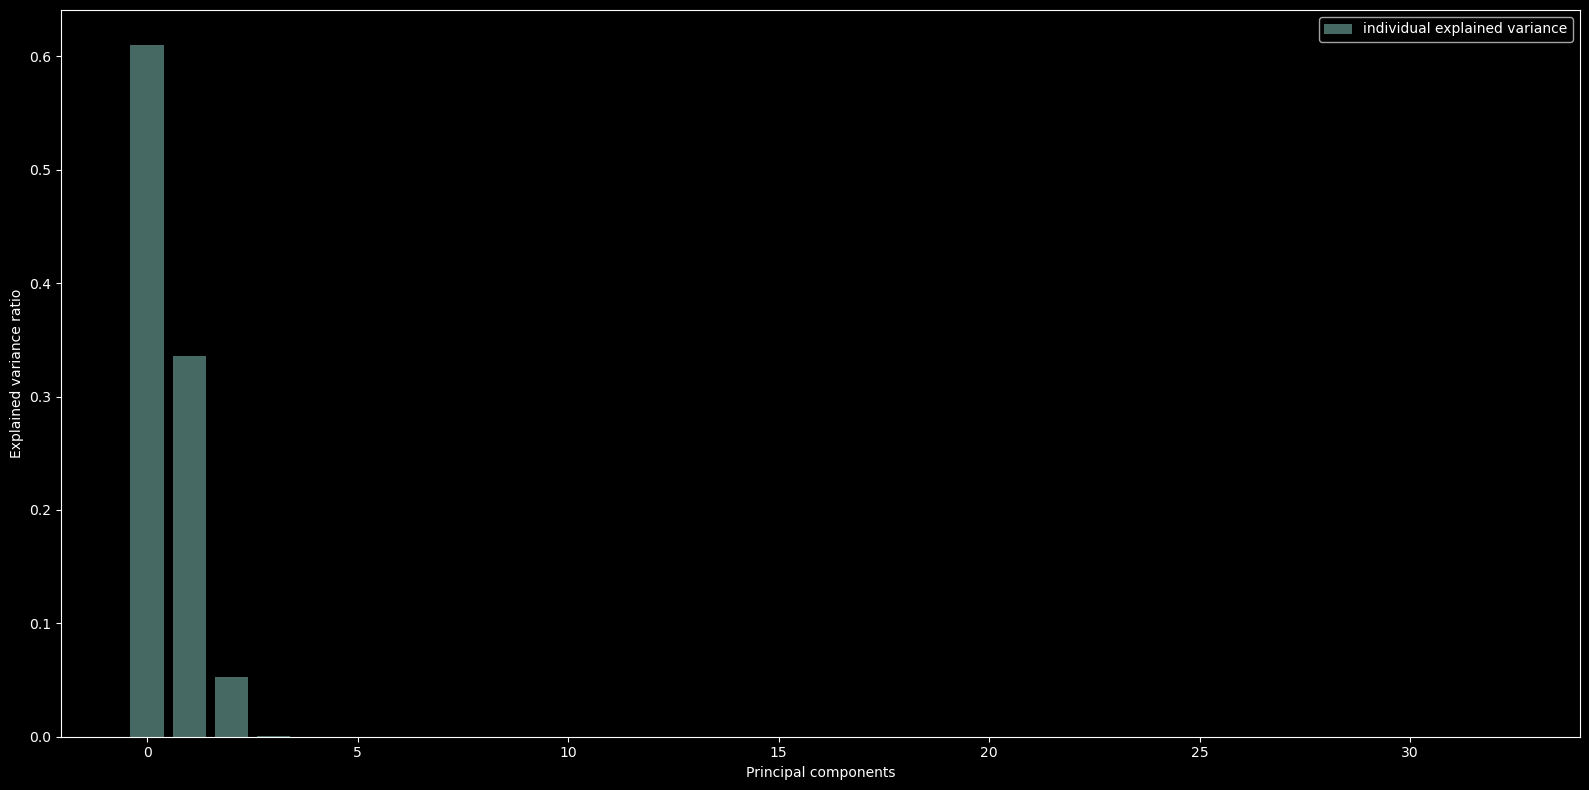

In [30]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(16, 8))
    
    plt.bar(range(33), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.61039423 0.33573706 0.05289631]


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [34]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [35]:
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [36]:
Ada_boost = AdaBoostRegressor()
Ada_boost.fit(X_train, y_train)

AdaBoostRegressor()

In [37]:
Bagging = BaggingRegressor()
Bagging.fit(X_train, y_train)

BaggingRegressor()

In [38]:
Extra_trees = ExtraTreesRegressor()
Extra_trees.fit(X_train, y_train)

ExtraTreesRegressor()

In [39]:
Gradient_boosting = GradientBoostingRegressor()
Gradient_boosting.fit(X_train, y_train)

GradientBoostingRegressor()

In [40]:
models= [('lin_reg', lin_reg), ('forest', forest), ('dt', tree),('Ada_boost',Ada_boost),('Bagging',Bagging),('Extra_trees',Extra_trees),('Gradient_boosting',Gradient_boosting)]
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

results= []
metric= []
for name, model in models:
    for i in scoring:
        scores = cross_validate(model, X_train, y_train, scoring=i, cv=10, return_train_score=True)
        results.append(scores)

print(results[20])

{'fit_time': array([3.43961716, 3.02506423, 2.96704245, 3.2862711 , 3.55281258,
       3.62328076, 3.83045244, 3.64016128, 3.59857512, 3.68982673]), 'score_time': array([0.00399947, 0.00299978, 0.00665665, 0.00554657, 0.0030179 ,
       0.00300145, 0.00312924, 0.00348592, 0.00409389, 0.00199509]), 'test_score': array([0.99434539, 0.99386995, 0.99242053, 0.99364933, 0.99285437,
       0.99384747, 0.99304793, 0.99363296, 0.9936965 , 0.99263827]), 'train_score': array([0.99515365, 0.99489962, 0.99461739, 0.99476625, 0.99451677,
       0.99489476, 0.99478788, 0.99512551, 0.99481143, 0.99462345])}


In [43]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

ETC = ExtraTreesRegressor()
gb_param_grid = {'n_estimators' : [100,200,300,400,500],
              'max_depth': [4, 8,12,16],
              'min_samples_leaf' : [100,150,200,250],
              'max_features' : [0.3, 0.1] 
              }

gsETC = GridSearchCV(ETC,param_grid = gb_param_grid, cv=10, n_jobs= -1, verbose = 0)

gsETC.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 12, 16],
                         'max_features': [0.3, 0.1],
                         'min_samples_leaf': [100, 150, 200, 250],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [44]:
ETC_best = gsETC.best_estimator_

In [45]:
gsETC.best_score_,gsETC.best_params_

(0.5303973866280712,
 {'max_depth': 8,
  'max_features': 0.3,
  'min_samples_leaf': 100,
  'n_estimators': 100})

In [46]:
ETC = ExtraTreesRegressor(max_depth= 8,max_features = 0.3,min_samples_leaf =  100,n_estimators= 500)
ETC.fit(X_train, y_train)


#predicting the test set
y_pred = ETC.predict(X_test)

In [47]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 1391.0749134759626
MSE: 2562749.935275668
RMSE: 1600.8591241191923
